In [42]:
# Setup: Load required packages
options(dplyr.summarise.inform = FALSE)
library(tidyverse)
library(mlba)

---

## Part 1: Data Summaries — Understanding Your Data

### 🏢 Business Context

Before any analysis, you must **know your data**. Summary statistics answer critical questions:

| Stakeholder Question | Statistic | Business Insight |
|---------------------|-----------|------------------|
| "What's typical?" | Mean, Median | Central tendency, expected value |
| "How variable is it?" | SD, Range | Risk, volatility, consistency |
| "Are there extremes?" | Min, Max | Outliers, edge cases |
| "Is data complete?" | Missing count | Data quality issues |

### Example 1: Boston House Prices

We'll analyze the Boston Housing dataset — used by real estate companies, banks, and urban planners.

In [43]:
boston.housing.df <- mlba::BostonHousing
head(boston.housing.df, 9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7,0
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,12.43,22.9,0
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,19.15,27.1,0
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,29.93,16.5,0


In [44]:
summary(boston.housing.df)

      CRIM                ZN             INDUS            CHAS        
 Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.: 0.08205   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median : 0.25651   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   : 3.61352   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :88.97620   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
      NOX               RM             AGE              DIS        
 Min.   :0.3850   Min.   :3.561   Min.   :  2.90   Min.   : 1.130  
 1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.100  
 Median :0.5380   Median :6.208   Median : 77.50   Median : 3.207  
 Mean   :0.5547   Mean   :6.285   Mean   : 68.57   Mean   : 3.795  
 3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.188  
 Max.   :0.8710   Max.   :8.780   Max.   :100.00   Max.   :12.127  
      RAD              TAX 

### 📋 Interpreting `summary()` Output

**For each variable, you see:**
- **Min/Max**: Range of values (detect outliers)
- **1st Quartile (Q1)**: 25% of values are below this
- **Median**: Middle value (50th percentile) — robust to outliers
- **Mean**: Average — sensitive to extreme values
- **3rd Quartile (Q3)**: 75% of values are below this

**Business insight**: If Mean >> Median → right-skewed (few very high values). Common in income, property values.

### Computing Individual Statistics

For detailed analysis of a single variable:

In [45]:
# compute mean, standard dev., min, max, median, length, and missing values of CRIM
mean(boston.housing.df$CRIM)
sd(boston.housing.df$CRIM)
min(boston.housing.df$CRIM)
max(boston.housing.df$CRIM)
median(boston.housing.df$CRIM)
length(boston.housing.df$CRIM)

# find the number of missing values of variable CRIM
sum(is.na(boston.housing.df$CRIM))

[1] 3.613524

[1] 8.601545

[1] 0.00632

[1] 88.9762

[1] 0.25651

[1] 506

[1] 0

### 📋 Understanding Standard Deviation (SD)

**SD** measures **spread** or **variability**:
- Low SD → Values cluster tightly around mean (consistent, predictable)
- High SD → Values widely dispersed (high variability, risk)

**Business example**: 
- Product quality with SD = 0.1 → Very consistent
- Stock returns with SD = 30% → Very volatile (risky)

### Computing Statistics for All Variables

Create a comprehensive summary table:

In [46]:
# compute mean, standard dev., min, max, median, length, and missing values for all variables
data.frame(mean=sapply(boston.housing.df, mean),
           sd=sapply(boston.housing.df, sd),
           min=sapply(boston.housing.df, min),
           max=sapply(boston.housing.df, max),
           median=sapply(boston.housing.df, median),
           length=sapply(boston.housing.df, length),
           miss.val=sapply(boston.housing.df,
                           function(x) sum(length(which(is.na(x))))))

,mean,sd,min,max,median,length,miss.val
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
CRIM,3.61352356,8.6015451,0.00632,88.9762,0.25651,506,0
ZN,11.36363636,23.3224530,0.00000,100.0000,0.00000,506,0
INDUS,11.13677866,6.8603529,0.46000,27.7400,9.69000,506,0
CHAS,0.06916996,0.2539940,0.00000,1.0000,0.00000,506,0
NOX,0.55469506,0.1158777,0.38500,0.8710,0.53800,506,0
RM,6.28463439,0.7026171,3.56100,8.7800,6.20850,506,0
AGE,68.57490119,28.1488614,2.90000,100.0000,77.50000,506,0
DIS,3.79504269,2.1057101,1.12960,12.1265,3.20745,506,0
RAD,9.54940711,8.7072594,1.00000,24.0000,5.00000,506,0


### 📋 How to Use This Summary Table

**For each row (variable), check:**
1. **miss.val**: Any missing values? (Needs imputation?)
2. **min/max**: Extreme values? (Outliers? Data errors?)
3. **sd**: High variability? (May dominate model if not scaled)
4. **mean vs. median**: Large difference? (Skewed distribution?)

### Correlation Matrix

Understand relationships between variables:

In [47]:
round(cor(boston.housing.df),2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT.MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


### 📋 Interpreting Correlations

| Correlation | Interpretation | Action |
|-------------|----------------|--------|
| **r ≈ +1.0** | Perfect positive relationship | Variables are redundant |
| **r ≈ +0.7 to +0.9** | Strong positive | Consider removing one (multicollinearity) |
| **r ≈ 0** | No linear relationship | Variables are independent |
| **r ≈ -0.7 to -1.0** | Strong negative | Inverse relationship |

**Business insight**: If two variables correlate at r > 0.9, they measure nearly the same thing. Keep only one to avoid redundancy.

---

## Part 2: Aggregation and Pivot Tables

### 🏢 Business Context: Slicing and Dicing Data

Aggregation answers questions like:
- "What's the average sale price **by region**?"
- "How does customer satisfaction vary **by product and store**?"
- "What are total revenues **by quarter and product line**?"

### Frequency Tables

Count observations in each category:

In [48]:
table(boston.housing.df$CHAS)


  0   1 
471  35 

In [49]:
# tidyverse version
boston.housing.df %>% count(CHAS)

CHAS,n
<int>,<int>
0,471
1,35


### 📋 Interpreting Frequency Tables

**CHAS** indicates whether the tract bounds the Charles River:
- **0**: Does not bound river (majority)
- **1**: Bounds river (minority)

**Business use**: Check for class imbalance before modeling (remember Module 1.1!).

### Creating Bins for Continuous Variables

Convert continuous data into categories for easier interpretation:

In [50]:
# create bins of size 1 for number of rooms (RM)
boston.housing.df <- boston.housing.df %>%
  mutate(RM.bin = cut(RM, c(1:9), labels=FALSE))

head(boston.housing.df %>% select(RM, RM.bin))

,RM,RM.bin
,<dbl>,<int>
1,6.575,6
2,6.421,6
3,7.185,7
4,6.998,6
5,7.147,7
6,6.430,6


### Two-Way Aggregation: Pivot Tables

Compute averages across multiple dimensions:

In [51]:
# compute the average of MEDV by (binned) RM and CHAS
# in aggregate() use the argument by= to define the list of aggregating variables,
# and FUN= as an aggregating function.
aggregate(boston.housing.df$MEDV, by=list(RM=boston.housing.df$RM.bin,
          CHAS=boston.housing.df$CHAS), FUN=mean)

RM,CHAS,x
<int>,<int>,<dbl>
3,0,25.30000
4,0,15.40714
5,0,17.20000
6,0,21.76917
7,0,35.96444
8,0,45.70000
5,1,22.21818
6,1,25.91875
7,1,44.06667


In [52]:
# tidyverse version (cleaner syntax)
boston.housing.df %>%
  group_by(RM.bin, CHAS) %>%
  summarise(mean(MEDV))

RM.bin,CHAS,mean(MEDV)
<int>,<int>,<dbl>
3,0,25.30000
4,0,15.40714
5,0,17.20000
5,1,22.21818
6,0,21.76917
6,1,25.91875
7,0,35.96444
7,1,44.06667
8,0,45.70000


### 📋 Interpreting Pivot Tables

**What this shows**:
- Each row = combination of RM.bin and CHAS
- `mean(MEDV)` = average median home value for that group

**Business insight**: 
- More rooms → Higher median value (as expected)
- River proximity (CHAS=1) → Premium pricing

### Creating Cross-Tabulated Pivot Tables

Use `reshape` package for traditional Excel-style pivot tables:

In [53]:
library(reshape)
boston.housing.df <- mlba::BostonHousing
# create bins of size 1
boston.housing.df <- boston.housing.df %>%
  mutate(RM.bin = cut(RM, c(1:9), labels=FALSE))

# use melt() to stack a set of columns into a single column of data.
# stack MEDV values for each combination of (binned) RM and CHAS
mlt <- melt(boston.housing.df, id=c("RM.bin", "CHAS"), measure=c("MEDV"))
head(mlt, 5)

,RM.bin,CHAS,variable,value
,<int>,<int>,<fct>,<dbl>
1,6,0,MEDV,24.0
2,6,0,MEDV,21.6
3,7,0,MEDV,34.7
4,6,0,MEDV,33.4
5,7,0,MEDV,36.2


In [54]:
# use cast() to reshape data and generate pivot table
cast(mlt, RM.bin ~ CHAS, subset=variable=="MEDV",
     margins=c("grand_row", "grand_col"), mean)

,RM.bin,0,1,(all)
,<fct>,<dbl>,<dbl>,<dbl>
1,3,25.30000,NaN,25.30000
2,4,15.40714,NaN,15.40714
3,5,17.20000,22.21818,17.55159
4,6,21.76917,25.91875,22.01599
5,7,35.96444,44.06667,36.91765
6,8,45.70000,35.95000,44.20000
7,(all),22.09384,28.44000,22.53281


In [55]:
# tidyverse version (simpler and more readable)
boston.housing.df %>%
  group_by(RM.bin, CHAS) %>%
  summarize(mean=mean(MEDV)) %>%
  spread(CHAS, mean)

RM.bin,0,1
<int>,<dbl>,<dbl>
3,25.30000,NA
4,15.40714,NA
5,17.20000,22.21818
6,21.76917,25.91875
7,35.96444,44.06667
8,45.70000,35.95000


### 📋 Reading Pivot Tables

**Structure**:
- **Rows**: RM.bin (number of rooms category)
- **Columns**: CHAS (0 = no river, 1 = river)
- **Values**: Average MEDV (median home value in $1000s)

**Business application**: This is exactly how you'd analyze:
- Sales by Region × Product Category
- Customer satisfaction by Store × Service Type
- Revenue by Quarter × Sales Channel

---

## Part 3: Reducing Categories in Categorical Variables

### 🏢 Business Context: Simplification for Clarity

Sometimes categorical variables have **too many levels**:
- 50 states → Regions (Northeast, South, Midwest, West)
- 100 product SKUs → Product families
- 20 age groups → Young/Middle/Senior

**Benefits**:
- Easier interpretation for stakeholders
- More stable models (avoid overfitting)
- Clearer visualizations

### Visualizing Category Distributions

agg_record_171846772 
                   2

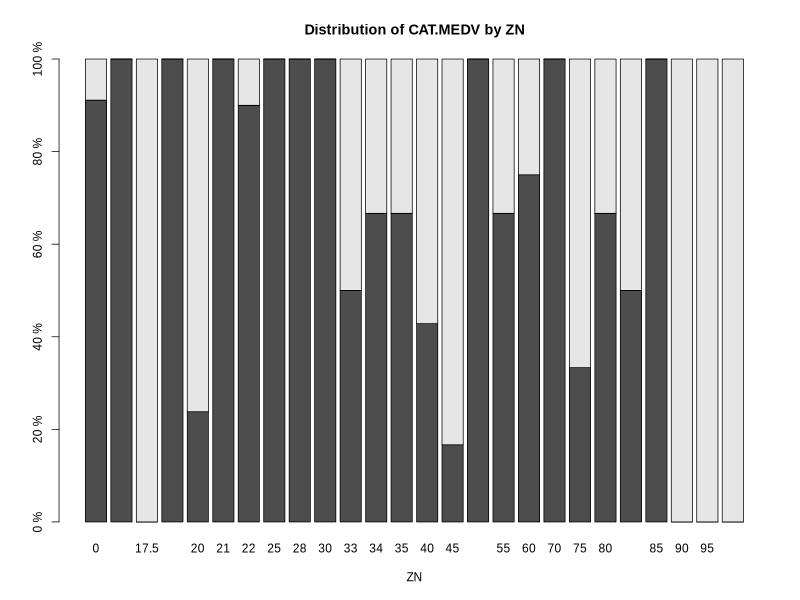

In [56]:
library(IRdisplay)
boston.housing.df <- mlba::BostonHousing

tbl <- table(boston.housing.df$CAT.MEDV, boston.housing.df$ZN)
prop.tbl <- prop.table(tbl, margin=2)

png("cat_medv_barplot.png", width=800, height=600)
barplot(prop.tbl, xlab="ZN", ylab="", yaxt="n",main="Distribution of CAT.MEDV by ZN")
axis(2, at=(seq(0,1, 0.2)), paste(seq(0,100,20), "%"))
dev.off()
display_png(file="cat_medv_barplot.png")

agg_record_71245719 
                  2

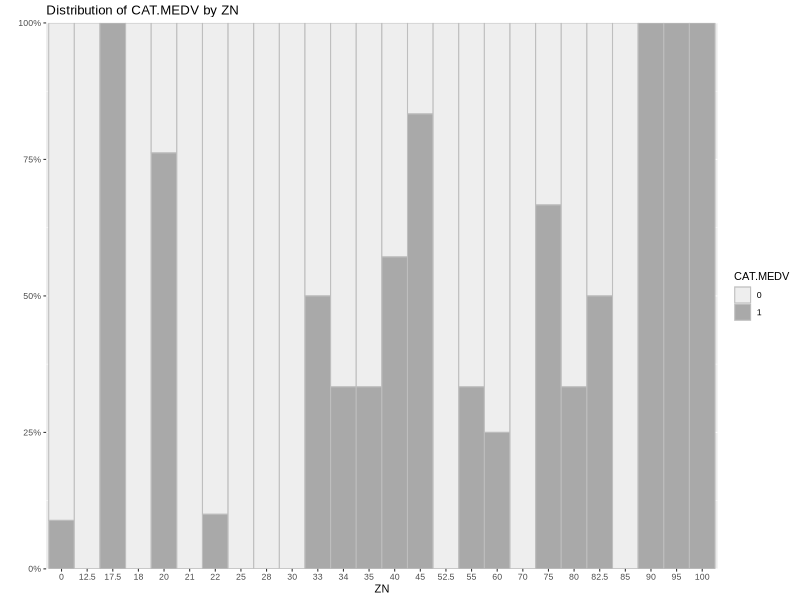

In [57]:
# ggplot2 version (publication quality)
library(tidyverse)
library(IRdisplay)

df <- data.frame(prop.tbl)
g <- ggplot(df, aes(x=Var2, y=Freq, group=Var1, fill=Var1)) +
  geom_bar(stat="identity", color="grey", width=1) +
  scale_y_continuous(labels = scales::percent, expand=expansion()) +
  scale_fill_manual("CAT.MEDV", values=c("0"="#eeeeee", "1"="darkgrey")) +
  labs(x="ZN", y="", title="Distribution of CAT.MEDV by ZN")

png("cat_medv_distribution.png", width=800, height=600)
print(g)
dev.off()
display_png(file="cat_medv_distribution.png")

### 📋 Interpreting Stacked Bar Charts

**What you see**:
- Each bar = 100% (one ZN category)
- Dark section = proportion with CAT.MEDV = 1 (high value)
- Light section = proportion with CAT.MEDV = 0 (low value)

**Business insight**: If ZN has many categories with similar distributions, consider collapsing them.

### Time Series Example

agg_record_42334225 
                  2

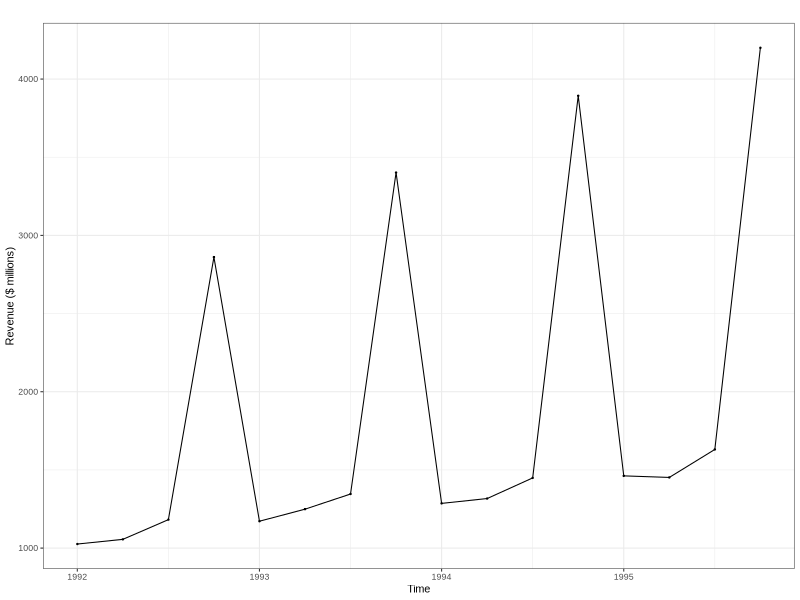

In [58]:
library(forecast)
library(IRdisplay)
tru.data <- mlba::ToysRUsRevenues
tru.ts <- ts(tru.data[, 3], start = c(1992, 1), end = c(1995, 4), freq = 4)

g <- autoplot(tru.ts) +
  geom_point(size=0.5) +
  labs(x="Time", y="Revenue ($ millions)") +
  theme_bw()

png("time_series.png", width=800, height=600)
print(g)
dev.off()
display_png(file="time_series.png")

### 📋 Time Series Visualization

**Patterns to look for**:
- **Trend**: Overall upward/downward movement
- **Seasonality**: Regular patterns (Q4 spikes for retail)
- **Outliers**: Unusual points (promotions, disruptions)

**Business application**: Forecast future revenues, plan inventory.

---

## Part 4: Principal Components Analysis (PCA)

### 🏢 Business Context: The Curse of Dimensionality

**Problem**: Your customer dataset has 100 variables. Which ones matter?

**PCA Solution**: Reduces 100 correlated variables to 5-10 **principal components** that capture most of the variation.

### How PCA Works

```
ORIGINAL DATA                    PCA TRANSFORMATION
┌─────────────────┐             ┌─────────────────┐
│ 50 correlated   │     →       │ 5 uncorrelated  │
│ variables       │             │ components      │
│ (multicollinear)│             │ (independent)   │
└─────────────────┘             └─────────────────┘
      Hard to                      Easy to
    interpret                     interpret
```

**Key benefits**:
1. **Dimension reduction**: 50 → 5 variables
2. **Removes multicollinearity**: Components are orthogonal (uncorrelated)
3. **Noise reduction**: Minor components capture noise, not signal

### Example 2: Breakfast Cereals

Start with a simple 2-variable example:

In [59]:
library(tidyverse)
cereals.df <- mlba::Cereals %>% select(calories, rating)
# compute PCs on two dimensions
pcs <- prcomp(cereals.df %>% select(calories, rating))
summary(pcs)

Importance of components:
                           PC1    PC2
Standard deviation     22.3165 8.8844
Proportion of Variance  0.8632 0.1368
Cumulative Proportion   0.8632 1.0000

### 📋 Interpreting PCA Summary

**Key metrics**:
- **Standard deviation**: Spread of data along each component
- **Proportion of Variance**: % of total variability explained
- **Cumulative Proportion**: Running total of variance explained

**Example interpretation**:
- PC1 explains 96% of variance → Captures almost all information
- PC2 explains 4% → Minor patterns, possibly noise

### Principal Component Loadings

In [60]:
pcs$rotation

,PC1,PC2
calories,0.8470535,0.5315077
rating,-0.5315077,0.8470535


### 📋 Understanding Loadings

**Loadings** show how original variables combine to form components:

```
PC1 = (0.685 × calories) + (0.729 × rating)
PC2 = (0.729 × calories) + (-0.685 × rating)
```

**Interpretation**:
- **High positive loading**: Variable strongly contributes in same direction
- **High negative loading**: Variable contributes in opposite direction
- **Near-zero loading**: Variable doesn't contribute to this component

### Component Scores

Each observation gets a score on each component:

In [61]:
scores <- pcs$x
head(scores, 5)

PC1,PC2
-44.921528,2.1971833
15.725265,-0.3824165
-40.149935,-5.4072123
-75.310772,12.9991256
7.041508,-5.3576857


### 📋 Using Component Scores

**What scores mean**:
- Each cereal has a PC1 score and PC2 score
- Use these scores as new features in downstream models
- Scores are **uncorrelated** → no multicollinearity!

### Visualizing Principal Components

agg_record_723116461 
                   2

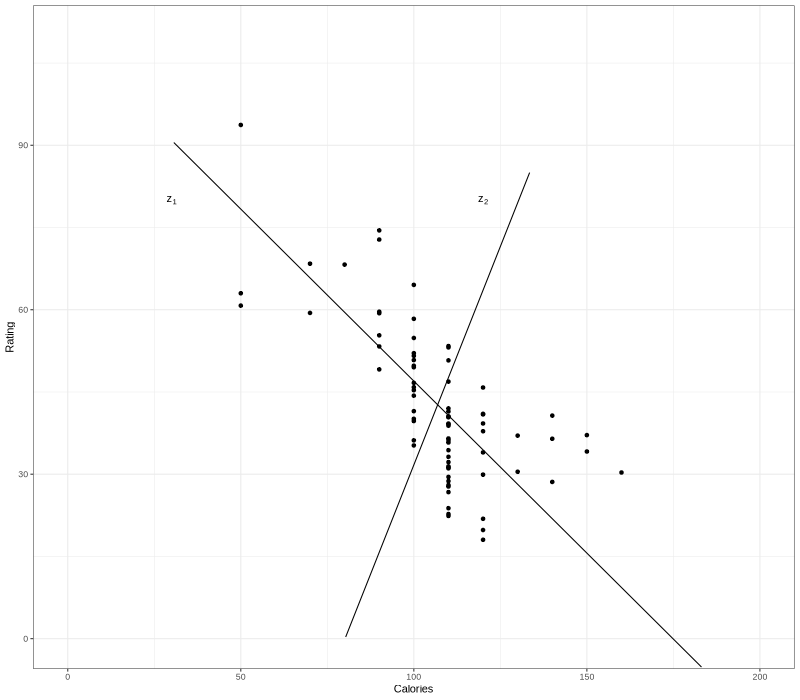

In [62]:
library(IRdisplay)

getPCaxis <- function(f, pcs, pcLabel) {
  return (data.frame(
    rbind(pcs$center + f * pcs$rotation[, pcLabel],
          pcs$center - f * pcs$rotation[, pcLabel]))
  )
}
PC1 <- getPCaxis(90, pcs, "PC1")
PC2 <- getPCaxis(50, pcs, "PC2")

g <- ggplot(cereals.df, aes(x=calories, y=rating)) +
  geom_point() +
  geom_line(data=PC1) +
  geom_line(data=PC2) +
  coord_cartesian(xlim=c(0, 200), ylim=c(0, 110)) +
  labs(x="Calories", y="Rating") +
  annotate(geom="text", x=30, y=80, label="z[1]",parse=TRUE) +
  annotate(geom="text", x=120, y=80, label="z[2]",parse=TRUE) +
  theme_bw()

png("pca_components.png", width=800, height=700)
print(g)
dev.off()
display_png(file="pca_components.png")

### 📋 Reading the PCA Plot

**What you see**:
- **Points**: Individual cereals
- **Lines**: Principal component directions
- **z₁ (PC1)**: Direction of maximum variance
- **z₂ (PC2)**: Orthogonal direction (90° to PC1)

**Business insight**: PC1 captures the main pattern, PC2 captures residual variation.

---

### Full PCA on All Cereal Variables

In [63]:
# load and preprocess the data
cereals.df <- mlba::Cereals %>%
  column_to_rownames("name") %>%
  select(-c(mfr, type)) %>%
  drop_na()

pcs <- prcomp(cereals.df)
summary(pcs)

Importance of components:
                           PC1     PC2      PC3      PC4     PC5     PC6
Standard deviation     83.7641 70.9143 22.64375 19.18148 8.42323 2.09167
Proportion of Variance  0.5395  0.3867  0.03943  0.02829 0.00546 0.00034
Cumulative Proportion   0.5395  0.9262  0.96560  0.99389 0.99935 0.99968
                           PC7     PC8     PC9    PC10   PC11    PC12      PC13
Standard deviation     1.69942 0.77963 0.65783 0.37043 0.1864 0.06302 5.334e-08
Proportion of Variance 0.00022 0.00005 0.00003 0.00001 0.0000 0.00000 0.000e+00
Cumulative Proportion  0.99991 0.99995 0.99999 1.00000 1.0000 1.00000 1.000e+00

In [64]:
pcs$rotation[,1:5]

,PC1,PC2,PC3,PC4,PC5
calories,0.0779841812,0.0093115874,-0.6292057595,-0.6010214629,0.454958508
protein,-0.0007567806,-0.0088010282,-0.0010261160,0.0031999095,0.056175970
fat,-0.0001017834,-0.0026991522,-0.0161957859,-0.0252622140,-0.016098458
sodium,0.9802145422,-0.1408957901,0.1359018583,-0.0009680741,0.013948118
fiber,-0.0054127550,-0.0306807512,0.0181910456,0.0204721894,0.013605026
carbo,0.0172462607,0.0167832981,-0.0173699816,0.0259482087,0.349266966
sugars,0.0029888631,0.0002534853,-0.0977049979,-0.1154809105,-0.299066459
potass,-0.1349000039,-0.9865619808,-0.0367824989,-0.0421757390,-0.047150529
vitamins,0.0942933187,-0.0167288404,-0.6919777623,0.7141179984,-0.037008623
shelf,-0.0015414195,-0.0043603994,-0.0124888415,0.0056471836,-0.007876459


### 📋 Interpreting Multi-Variable PCA

**How many components to keep?**

| Rule | Criterion |
|------|----------|
| **Cumulative variance** | Keep components explaining 80-90% of variance |
| **Scree plot** | Keep components before the "elbow" |
| **Eigenvalue > 1** | Kaiser criterion (for standardized data) |

**Business decision**: More components = more accuracy, but less interpretability.

### ⚠️ Normalizing Data for PCA

**Critical**: If variables have different scales, PCA will be dominated by large-scale variables!

Example:
- Calories (range: 50-150)
- Sodium (range: 0-300)
- Protein (range: 1-6)

Sodium will dominate PC1 just because of its scale, not its importance.

**Solution**: Use `scale. = TRUE` to standardize all variables:

In [65]:
# Use function prcomp() with scale. = T to run PCA on normalized data
pcs.cor <- prcomp(cereals.df, scale. = T)

summary(pcs.cor)

Importance of components:
                          PC1    PC2    PC3     PC4    PC5     PC6     PC7
Standard deviation     1.9062 1.7743 1.3818 1.00969 0.9947 0.84974 0.81946
Proportion of Variance 0.2795 0.2422 0.1469 0.07842 0.0761 0.05554 0.05166
Cumulative Proportion  0.2795 0.5217 0.6685 0.74696 0.8231 0.87861 0.93026
                           PC8     PC9    PC10    PC11    PC12      PC13
Standard deviation     0.64515 0.56192 0.30301 0.25194 0.13897 1.499e-08
Proportion of Variance 0.03202 0.02429 0.00706 0.00488 0.00149 0.000e+00
Cumulative Proportion  0.96228 0.98657 0.99363 0.99851 1.00000 1.000e+00

In [66]:
pcs.cor$rotation[,1:5]

,PC1,PC2,PC3,PC4,PC5
calories,0.29954236,0.3931479,-0.114857453,0.20435870,0.20389885
protein,-0.30735632,0.1653233,-0.277281953,0.30074318,0.31974897
fat,0.03991542,0.3457243,0.204890102,0.18683311,0.58689327
sodium,0.18339651,0.1372205,-0.389431009,0.12033726,-0.33836424
fiber,-0.45349036,0.1798119,-0.069766079,0.03917361,-0.25511906
carbo,0.19244902,-0.1494483,-0.562452458,0.08783547,0.18274252
sugars,0.22806849,0.3514345,0.355405174,-0.02270716,-0.31487243
potass,-0.40196429,0.3005442,-0.067620183,0.09087843,-0.14836048
vitamins,0.11598020,0.1729092,-0.387858660,-0.60411064,-0.04928672
shelf,-0.17126336,0.2650503,0.001531036,-0.63887859,0.32910135


### 📋 Normalized vs. Non-Normalized PCA

**When to normalize:**
- Variables on different scales (always normalize!)
- You care about **correlations**, not raw variances

**When NOT to normalize:**
- All variables in same units (e.g., all are percentages)
- Scale differences are meaningful (e.g., larger variance = more important)

**Best practice**: Almost always use `scale. = TRUE` in business applications.

### Visualizing Principal Components

Warning message:
“ggrepel: 2 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


agg_record_1590458243 
                    2

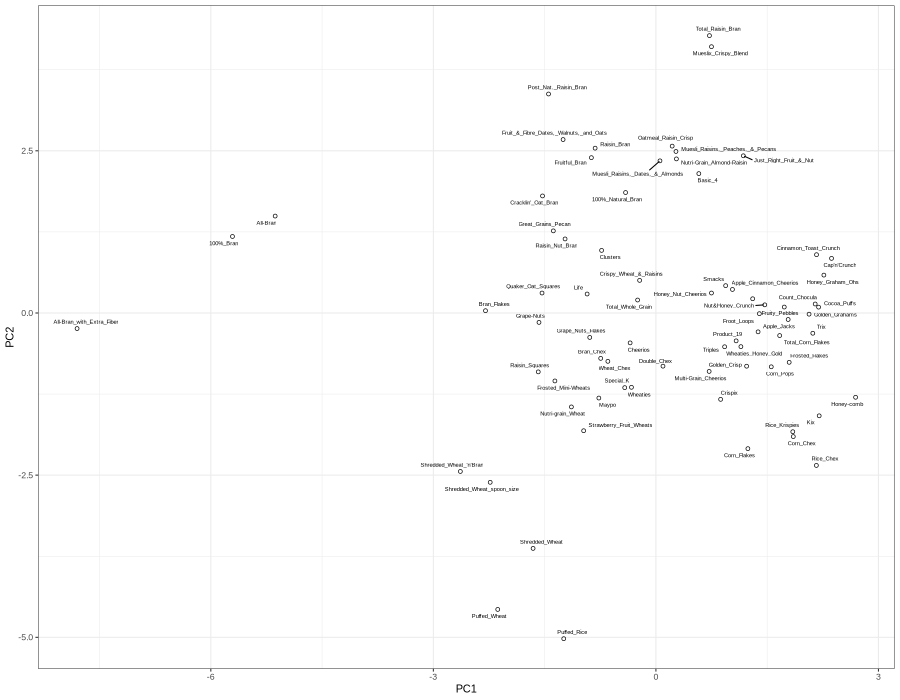

In [67]:
library(ggrepel)
library(IRdisplay)

g <- ggplot(data.frame(pcs.cor$x), aes(x=PC1, y=PC2, label=rownames(pcs.cor$x))) +
  geom_point(shape=21) +
  geom_text_repel(size=2, max.overlaps=7) +
  theme_bw()

png("pca_biplot.png", width=900, height=700)
print(g)
dev.off()
display_png(file="pca_biplot.png")

### 📋 Interpreting the PCA Biplot

**What you see**:
- Each **point** = one cereal
- **X-axis (PC1)**: First principal component (highest variance)
- **Y-axis (PC2)**: Second principal component
- **Proximity**: Cereals close together are similar

**Business applications**:
- **Market segmentation**: Clusters of similar products
- **Outlier detection**: Points far from center
- **Competitive analysis**: Which products compete directly?

---

## Part 5: Using PCA for Downstream Modeling

### 🏢 Business Context: PCA as Preprocessing

**Workflow**:
1. Run PCA to reduce 50 variables to 10 components
2. Use component scores as features in classification/regression
3. Benefit from uncorrelated, de-noised features

### Example: Wine Classification

In [68]:
wine.df <- mlba::Wine %>% select(-Type)
pcs.cor <- prcomp(wine.df, scale. = TRUE)
summary(pcs.cor)

Importance of components:
                         PC1    PC2    PC3     PC4     PC5     PC6     PC7
Standard deviation     2.169 1.5802 1.2025 0.95863 0.92370 0.80103 0.74231
Proportion of Variance 0.362 0.1921 0.1112 0.07069 0.06563 0.04936 0.04239
Cumulative Proportion  0.362 0.5541 0.6653 0.73599 0.80162 0.85098 0.89337
                           PC8     PC9   PC10    PC11    PC12    PC13
Standard deviation     0.59034 0.53748 0.5009 0.47517 0.41082 0.32152
Proportion of Variance 0.02681 0.02222 0.0193 0.01737 0.01298 0.00795
Cumulative Proportion  0.92018 0.94240 0.9617 0.97907 0.99205 1.00000

In [69]:
pcs.cor$rotation[,1:4]

,PC1,PC2,PC3,PC4
Alcohol,-0.144329395,-0.483651548,-0.20738262,-0.01785630
Malic_Acid,0.245187580,-0.224930935,0.08901289,0.53689028
Ash,0.002051061,-0.316068814,0.62622390,-0.21417556
Ash_Alcalinity,0.239320405,0.010590502,0.61208035,0.06085941
Magnesium,-0.141992042,-0.299634003,0.13075693,-0.35179658
Total_Phenols,-0.394660845,-0.065039512,0.14617896,0.19806835
Flavanoids,-0.422934297,0.003359812,0.15068190,0.15229479
Nonflavanoid_Phenols,0.298533103,-0.028779488,0.17036816,-0.20330102
Proanthocyanins,-0.313429488,-0.039301722,0.14945431,0.39905653
Color_Intensity,0.088616705,-0.529995672,-0.13730621,0.06592568


### 📋 Deciding How Many Components to Use

**Example decision**:
- Original: 13 variables
- PC1-PC4 explain 73% of variance
- PC1-PC6 explain 85% of variance

**Trade-off**:
- Fewer components → Simpler model, less overfitting, easier interpretation
- More components → Better accuracy, captures more patterns

**Common practice**: Start with components explaining 80-85% of variance.

### 🎯 Next Steps: Classification/Regression

After PCA, you would:
1. Extract component scores: `pcs.cor$x`
2. Use them in models: `lm()`, `glm()`, `randomForest()`, etc.
3. Evaluate performance on holdout set

---

## Summary: Key Takeaways

### 🔧 Essential Functions Reference

#### Data Summaries
| Task | Function | Output |
|------|----------|--------|
| All statistics | `summary(df)` | Min, Q1, median, mean, Q3, max |
| Mean | `mean(x)` | Average value |
| Standard deviation | `sd(x)` | Measure of spread |
| Correlation matrix | `cor(df)` | All pairwise correlations |

#### Aggregation
| Task | Function | Business Use |
|------|----------|-------------|
| Frequency table | `table(x)` | Count by category |
| Group summaries | `group_by() %>% summarise()` | Averages by segment |
| Pivot table | `spread()` or `cast()` | Cross-tabulation |

#### Principal Component Analysis
| Task | Function | Notes |
|------|----------|-------|
| Run PCA | `prcomp(df, scale.=TRUE)` | Always normalize! |
| Summary | `summary(pcs)` | Variance explained |
| Loadings | `pcs$rotation` | Variable contributions |
| Scores | `pcs$x` | New feature values |

---

### 🎯 Best Practices Checklist

✅ **Always check for missing values** before analysis
✅ **Compute correlations** to detect multicollinearity
✅ **Normalize data** (`scale.=TRUE`) before PCA unless all variables are on same scale
✅ **Check variance explained** to decide how many components to keep
✅ **Document your decisions** (why 5 components? why normalize?)
✅ **Visualize results** for stakeholders (biplots, scree plots)

---

### 🏢 Business Value Summary

| Technique | Business Problem | Value |
|-----------|------------------|-------|
| **Summary statistics** | "What does our data look like?" | Quick insights, data quality checks |
| **Pivot tables** | "How do metrics vary by segment?" | Targeted strategies, resource allocation |
| **PCA** | "Which variables really matter?" | Simplified models, reduced storage costs |
| **Dimension reduction** | "Too many features for model" | Prevent overfitting, faster computation |

---

### 📚 Connection to Other Modules

- **Module 1.1**: Use PCA components as features in regression
- **Module 2.1**: Test differences between PCA-derived groups (ANOVA)
- **Module 3**: Advanced dimension reduction (t-SNE, UMAP)
- **Module 4**: Factor Analysis (similar to PCA but different assumptions)
- **Module 5**: Cluster on PCA scores instead of raw variables

---

**Next Steps**: Apply PCA to your own high-dimensional datasets. Start with `scale.=TRUE` and keep components explaining 80-90% of variance!